In [1]:
from tensorflow.keras.layers import Dense, Input
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import numpy as np

In [2]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [3]:
encoding_dim = 32

In [4]:
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)


In [13]:
autoencoder = keras.Model(input_img, decoded)

In [14]:
encoder = keras.Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [15]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [16]:
autoencoder.fit(x_train, x_train,
               epochs=50,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2745 - val_loss: 0.1917
Epoch 2/50
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1716 - val_loss: 0.1545
Epoch 3/50
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1448 - val_loss: 0.1339
Epoch 4/50
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1288 - val_loss: 0.1216
Epoch 5/50
60000/60000 [==============================] - 1s 24us/sample - loss: 0.1187 - val_loss: 0.1136
Epoch 6/50
60000/60000 [==============================] - 2s 25us/sample - loss: 0.1117 - val_loss: 0.1078
Epoch 7/50
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1065 - val_loss: 0.1032
Epoch 8/50
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1026 - val_loss: 0.0998
Epoch 9/50
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0997 - val_

In [17]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

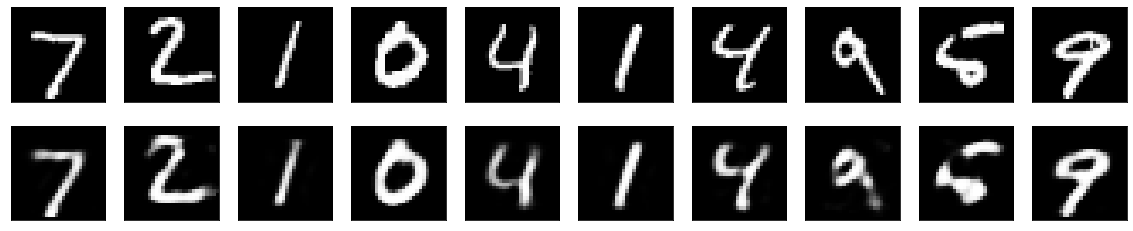

In [18]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [11]:
plt.show()